In [ ]:
# Train a ConvNet on the MNIST fashion data. 
# This data consists of 10 classes of fasion images such as shorts, dresses, 
# shoes, purses, etc. 
# Code is based on MNIST example found at Keras.io

In [2]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist # New with Keras 2.1.2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
# Number of classes - do not change unless the data changes
num_classes = 10

In [4]:
# sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

In [6]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
# type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
# Convert class vectors to binary class matrices. One-hot encoding
# 3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [13]:
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 15s 253us/step - loss: 0.6613 - accuracy: 0.7601 - val_loss: 0.4218 - val_accuracy: 0.8455
Epoch 2/24
60000/60000 [==============================] - 15s 243us/step - loss: 0.4230 - accuracy: 0.8477 - val_loss: 0.3770 - val_accuracy: 0.8625
Epoch 3/24
60000/60000 [==============================] - 16s 262us/step - loss: 0.3657 - accuracy: 0.8684 - val_loss: 0.3327 - val_accuracy: 0.8817
Epoch 4/24
60000/60000 [==============================] - 17s 277us/step - loss: 0.3330 - accuracy: 0.8799 - val_loss: 0.3109 - val_accuracy: 0.8895
Epoch 5/24
60000/60000 [==============================] - 17s 280us/step - loss: 0.3096 - accuracy: 0.8878 - val_loss: 0.2953 - val_accuracy: 0.8933
Epoch 6/24
60000/60000 [==============================] - 16s 271us/step - loss: 0.2888 - accuracy: 0.8963 - val_loss: 0.2869 - val_accuracy: 0.8956
Epoch 7/24
60000/60000 [==============================]

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2596789923608303
Test accuracy: 0.9179999828338623


In [19]:
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['accuracy']) + 1)) # values for x axis [1, 2, ...]

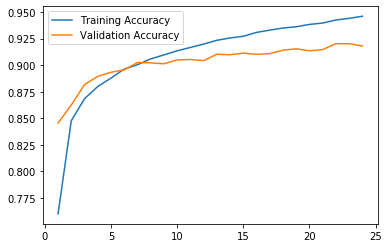

In [21]:
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()